# K Means Clustering Implementation

In [2]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np

In [12]:
X, y = make_blobs(n_samples=1000, centers=3, n_features=2, # corrdinate
                  random_state=23) # here we ignore y in clustering

In [13]:
X,y

(array([[-5.37039106,  3.47555168],
        [ 5.84161203, -3.98182959],
        [ 1.76127766,  9.39696306],
        ...,
        [ 6.14147823, -5.75491603],
        [-5.45330839,  1.75599573],
        [-0.21966953,  8.72922042]], shape=(1000, 2)),
 array([2, 1, 0, 2, 1, 0, 2, 1, 2, 0, 0, 0, 2, 0, 1, 2, 2, 2, 1, 1, 0, 1,
        2, 2, 0, 0, 1, 2, 0, 0, 0, 2, 1, 2, 1, 0, 1, 2, 2, 1, 0, 1, 1, 2,
        2, 1, 0, 2, 1, 1, 2, 2, 1, 2, 0, 2, 0, 2, 2, 2, 1, 0, 2, 2, 2, 2,
        2, 2, 0, 2, 2, 0, 0, 1, 1, 2, 0, 0, 1, 1, 0, 2, 1, 2, 2, 0, 1, 2,
        1, 2, 0, 1, 0, 0, 2, 0, 2, 1, 2, 2, 0, 2, 1, 2, 2, 2, 2, 0, 1, 1,
        0, 2, 2, 2, 2, 2, 2, 1, 2, 0, 0, 0, 1, 1, 1, 1, 0, 0, 2, 0, 2, 1,
        0, 0, 2, 1, 1, 2, 1, 2, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 2, 0, 0,
        1, 1, 1, 1, 2, 1, 2, 1, 0, 2, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 2,
        0, 0, 2, 1, 1, 2, 0, 1, 2, 1, 0, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 0,
        2, 2, 2, 0, 1, 1, 0, 0, 1, 0, 2, 0, 0, 1, 0, 2, 0, 1, 1, 0, 0, 1,
        1, 2

In [14]:
X.shape

(1000, 2)

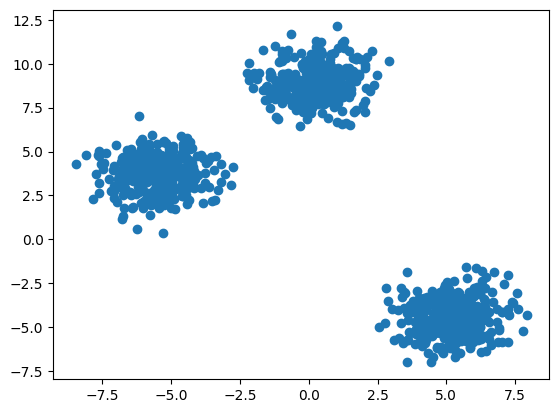

In [17]:
plt.scatter(X[:,0], X[:,1]) # c=y

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [20]:
from sklearn.cluster import KMeans

In [22]:
# find k value
# manual process
# elbow method to select the k value

wcss=[]
for k in range(1,11):
    kmeans= KMeans(n_clusters=k, init='k-means++')
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)

In [23]:
wcss

[34827.57682552021,
 7935.437286145418,
 1319.2730531585607,
 1140.4677884655125,
 993.4985847418333,
 892.937050692981,
 850.0746219822548,
 671.7603737797059,
 583.6646917581113,
 573.6103555133012]

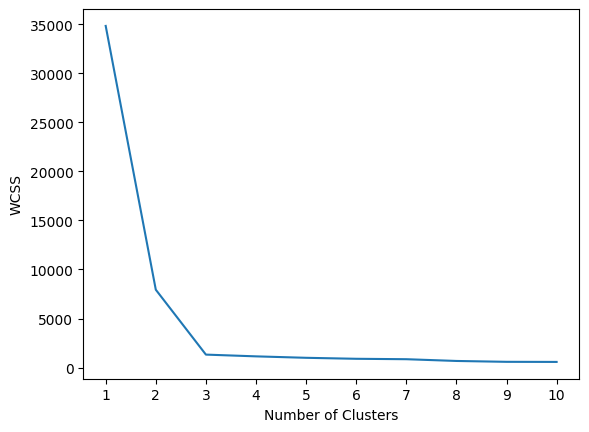

In [24]:
# plot
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show

In [25]:
# create a model

kmeans=KMeans(n_clusters=3, init='k-means++')

In [26]:
kmeans

KMeans(n_clusters=3)

In [28]:
y_label=kmeans.fit_predict(X_train)

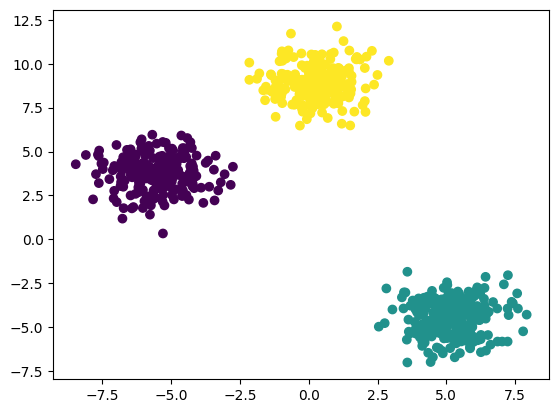

In [33]:
plt.scatter(X_train[:,0],X_train[:,1], c=y_label)

In [32]:
y_test= kmeans.predict(X_test)

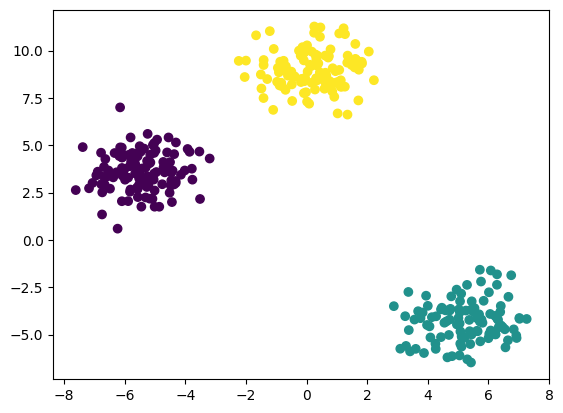

In [37]:
plt.scatter(X_test[:,0],X_test[:,1], c=y_test)

In [38]:
# knee locator
!pip install kneed


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [39]:
from kneed import KneeLocator

In [43]:
kl =KneeLocator(range(1,11), wcss, curve='convex', direction='decreasing')

In [44]:
kl.elbow

np.int64(3)

In [45]:
# performance metrics
# silhouette score

from sklearn.metrics import silhouette_score

In [54]:
silhouette_scores = []
  #silhouette score is undefined for k=1

for k in range(2,11):
    kmeans = KMeans(n_clusters=k, init='k-means++')
    kmeans.fit(X_train)
    score = silhouette_score(X_train,kmeans.labels_)
    silhouette_scores.append(score)

In [55]:
silhouette_scores

[np.float64(0.7281443868598331),
 np.float64(0.8071181203797672),
 np.float64(0.6578493349971984),
 np.float64(0.44332305284847995),
 np.float64(0.331630049797696),
 np.float64(0.5035220275167464),
 np.float64(0.33595364962358215),
 np.float64(0.34068693641075515),
 np.float64(0.32844777150639554)]

<function matplotlib.pyplot.show(close=None, block=None)>

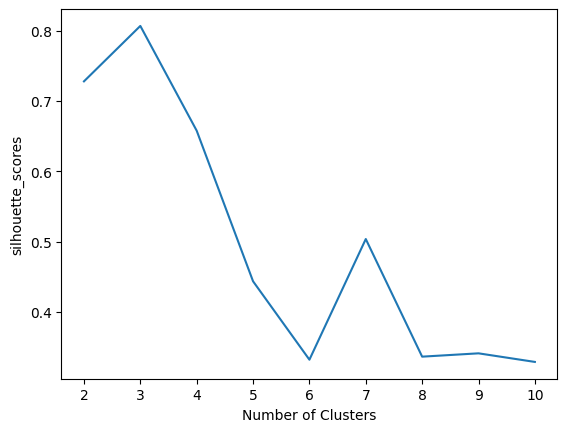

In [57]:
# plot
plt.plot(range(2,11),silhouette_scores)
plt.xticks(range(2,11))
plt.xlabel('Number of Clusters')
plt.ylabel('silhouette_scores')
plt.show

# -------------------------------------------------

In [26]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

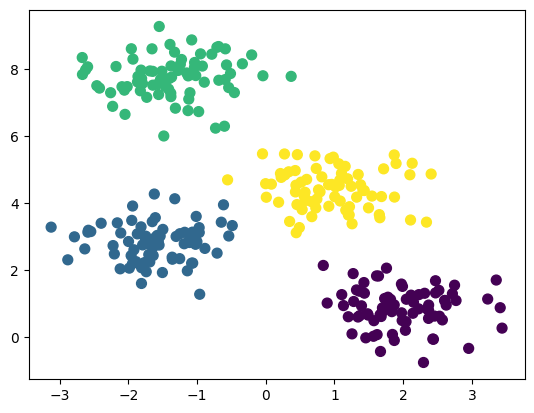

In [46]:
# Generate synthetic data with make_blobs
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# apply k mean
kmeans=KMeans(n_clusters=4)
kmeans.fit(X)

#Predicts clusters for all the data (X), which includes both training and testing.
# it’s just clustering the input data.
y_km = kmeans.predict(X)  

# Plot the clusters and their centers
plt.scatter(X[:, 0], X[:, 1], c=y_km, s=50)

## c=y_km	colors each point using its cluster label from y_km
## s=50	size of each point (50 pixels)
## cmap='viridis'	color map used to color the points nicely

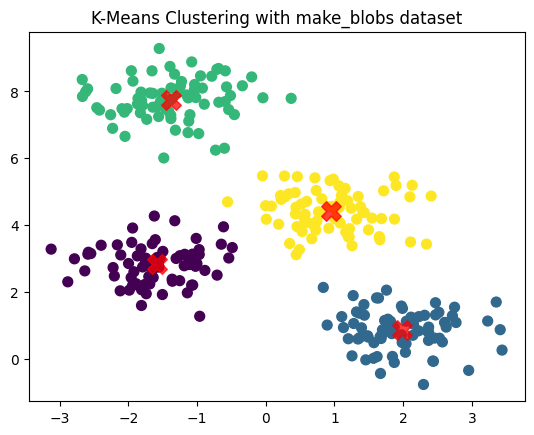

In [28]:
# Plot the clusters and their centers
plt.scatter(X[:, 0], X[:, 1], c=y_km, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.title("K-Means Clustering with make_blobs dataset")
plt.show()

In [30]:
silhouette_scores = []
k_range = range(2, 11)  # silhouette score is undefined for k=1

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(X)
    score = silhouette_score(X, cluster_labels)
    silhouette_scores.append(score)
    
silhouette_scores

[np.float64(0.4546802473065816),
 np.float64(0.5890390393551768),
 np.float64(0.6819938690643478),
 np.float64(0.5923027677672242),
 np.float64(0.4942157438930076),
 np.float64(0.42209738926832063),
 np.float64(0.4907684716680701),
 np.float64(0.477096640146303),
 np.float64(0.39434059958404155)]

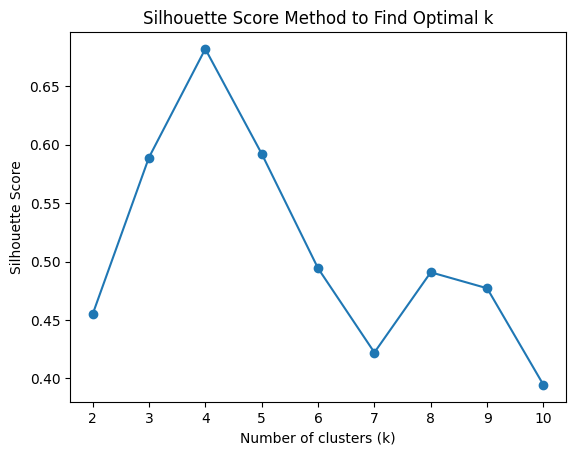

Best number of clusters by silhouette score: 4


In [33]:
# Plot silhouette scores
plt.plot(k_range, silhouette_scores, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Method to Find Optimal k')
plt.show()

# Print the best k
best_k = k_range[silhouette_scores.index(max(silhouette_scores))]
print(f"Best number of clusters by silhouette score: {best_k}")

# --------------------------------------------------

In [18]:
# train and test, predict

import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

In [20]:
# Step 1: Create dataset
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Step 2: Split into train and test sets (e.g., 70% train, 30% test)
X_train, X_test = train_test_split(X, test_size=0.3, random_state=42)



In [21]:
# Step 3: Train KMeans on training data
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X_train)

KMeans(n_clusters=4, random_state=42)

In [22]:
# Step 4: Predict clusters on test data
y_test_pred = kmeans.predict(X_test)

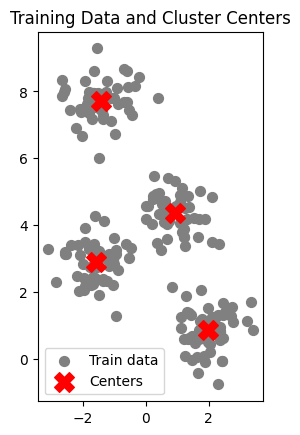

In [23]:
# Plot train data with true cluster colors (just for visualization)
plt.subplot(1, 2, 1)
plt.scatter(X_train[:, 0], X_train[:, 1], c='gray', s=50, label='Train data')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', s=200, marker='X', label='Centers')
plt.title("Training Data and Cluster Centers")
plt.legend()

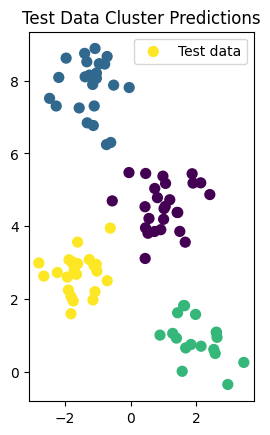

In [24]:
# Plot test data with predicted cluster colors
plt.subplot(1, 2, 2)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test_pred, s=50, cmap='viridis', label='Test data')
plt.title("Test Data Cluster Predictions")
plt.legend()

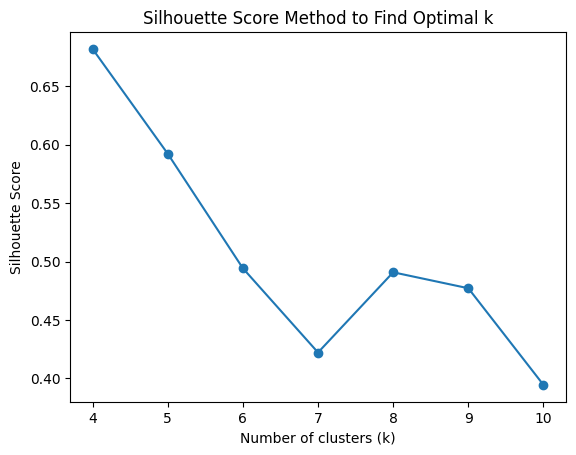

Best number of clusters by silhouette score: 10


In [37]:
silhouette_scores = []
k_range = range(4, 11)  # silhouette score is undefined for k=1

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(X)
    score = silhouette_score(X, cluster_labels)
    silhouette_scores.append(score)

# Plot silhouette scores
plt.plot(k_range, silhouette_scores, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Method to Find Optimal k')
plt.show()

# Print the best k
best_k = k_range[silhouette_scores.index(min(silhouette_scores))] # min
print(f"Best number of clusters by silhouette score: {best_k}")

# -------------------------------------------------

In [49]:
# Step 1: Take input from user
k = int(input("Enter the number of clusters (k): "))

# Step 2: Generate some sample data
X, _ = make_blobs(n_samples=300, centers=k, cluster_std=0.60, random_state=0)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

# Step 3: Apply KMeans with user input
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_train)

# Step 5: Predict cluster labels for train and test data
y_train = kmeans.predict(X_train)
y_test = kmeans.predict(X_test)


Enter the number of clusters (k):  5


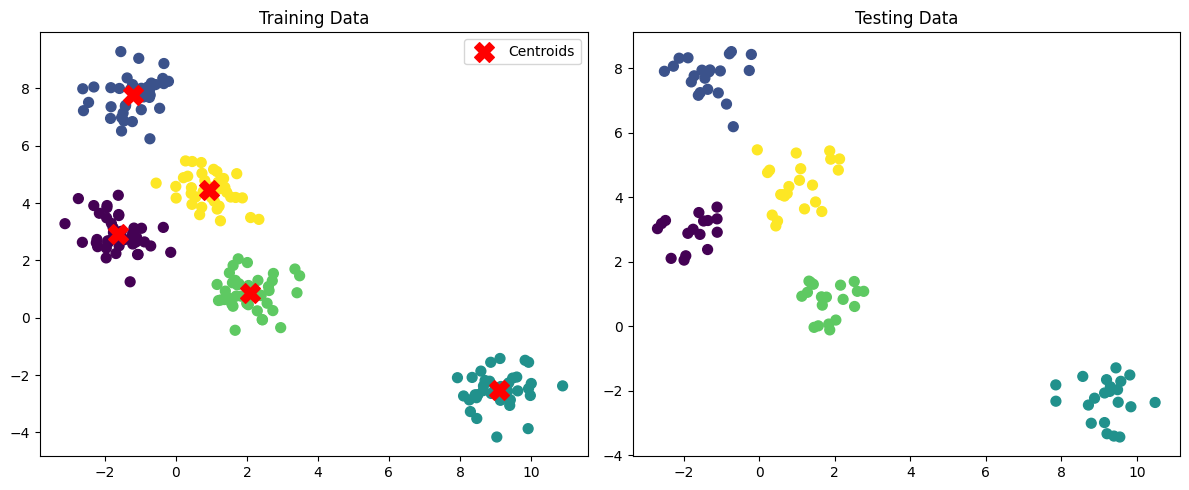

In [50]:
# Step 6: Plot
plt.figure(figsize=(12, 5))

# Training data plot
plt.subplot(1, 2, 1)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='viridis', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            c='red', s=200, marker='X', label='Centroids')
plt.title("Training Data")
plt.legend()

# Testing data plot
plt.subplot(1, 2, 2)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='viridis', s=50)
plt.title("Testing Data")

plt.tight_layout()
plt.show()